#HR Analytics: Job Change of Data Scientists

#Problem Statement


A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates.

Using the demographics, education, experience data, predict the probability of a candidate to look for a new job or will work for the company using machine learning techniques, as well as interpreting affected factors on employee decision.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:

df=pd.read_csv('/content/drive/MyDrive/datasets/aug_train.csv')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0



#Features
1.enrollee_id : Unique ID for candidate

2.city: City code

3.city_ development _index : Development index of the city

4.gender: Gender of candidate

5.relevent_experience: Relevant experience of candidate

6.enrolled_university: Type of University course enrolled if any

7.education_level: Education level of candidate

8.major_discipline :Education major discipline of candidate

9.experience: Candidate total experience in years

10.company_size: No of employees in current employer's company

11.company_type : Type of current employer

12.lastnewjob: Difference in years between previous job and current job

13.training_hours: training hours completed

14.target: 0 - Not looking for job change, 1 - Looking for a job change

In [ ]:
df.shape

(19158, 14)



*   There are 19157 rows and 14 columns
   



In [ ]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [ ]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object



*   There are three int datatype columns(enrollee_id,training_hours,target),one float datatype column(city_development_index) and the rest of the columns are in object data type.




In [ ]:
df.duplicated().sum()

0



*  The data set has no duplicates




In [ ]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000




*  This gives the descripition about numerical columns




In [ ]:
df['target'].value_counts()

target
0    14381
1     4777
Name: count, dtype: int64



*   The dataset is imbalanced
   



In [ ]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64



*  The data set contains missing values
*  Now we are going to replace the missing values






In [ ]:
for i in df.columns:
  df[i]=df[i].fillna(df[i].mode()[0])

**Gender**

In [ ]:
df.gender.value_counts()

gender
Male      17729
Female     1238
Other       191
Name: count, dtype: int64

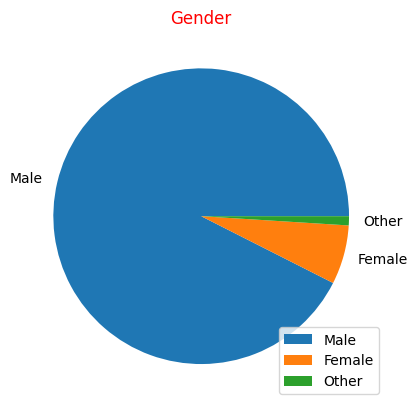

In [ ]:
plt.pie(df.gender.value_counts().values,labels=df.gender.value_counts().index)
plt.title('Gender',color='red')
plt.legend()

**Relevent experience**

In [ ]:
df.relevent_experience .value_counts()

relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64

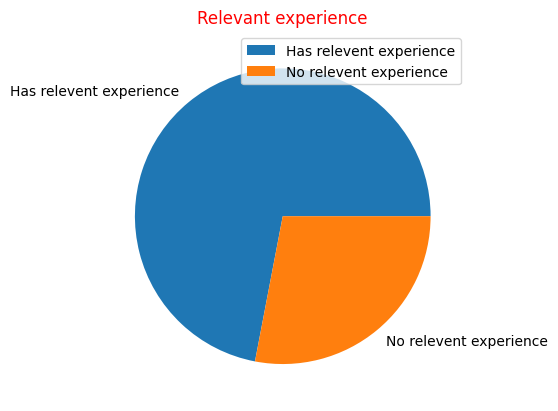

In [ ]:
plt.pie(df.relevent_experience.value_counts().values,labels=df.relevent_experience.value_counts().index)
plt.title('Relevant experience',color='red')
plt.legend()

**Enrolled University**

In [ ]:
df.enrolled_university.value_counts()

enrolled_university
no_enrollment       14203
Full time course     3757
Part time course     1198
Name: count, dtype: int64

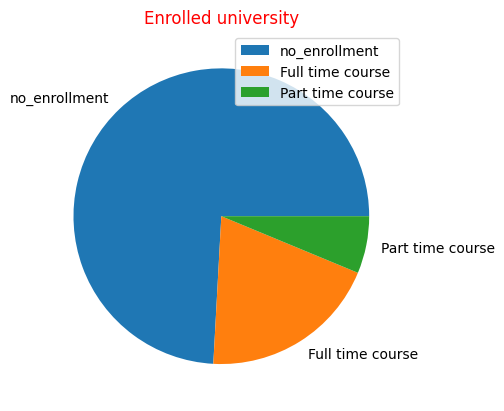

In [ ]:
plt.pie(df.enrolled_university.value_counts().values,labels=df.enrolled_university.value_counts().index)
plt.title('Enrolled university',color='red')
plt.legend(loc='upper right')

**Education level**

In [ ]:
df.education_level  .value_counts()

education_level
Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

Text(0, 0.5, 'Value')

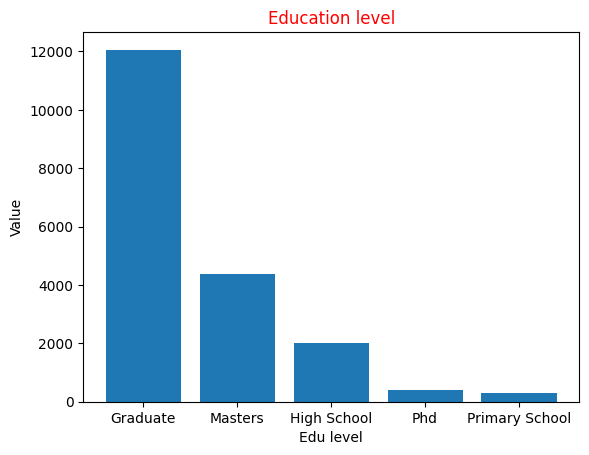

In [ ]:
plt.bar(df.education_level.value_counts().index,df.education_level.value_counts().values)
plt.title('Education level',color='red')
plt.xlabel('Edu level')
plt.ylabel('Value')



*  Here the education level is ordinal.So we replace lower to higher education from 0 to 4
  


In [ ]:
df['education_level'].replace(['Primary School','High School','Graduate','Masters','Phd'],[0,1,2,3,4],inplace=True)
df['education_level']=df['education_level'].astype(int)

**Major discipline**

In [ ]:
df.major_discipline.value_counts()



major_discipline
STEM               17305
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64

Text(0, 0.5, 'Count')

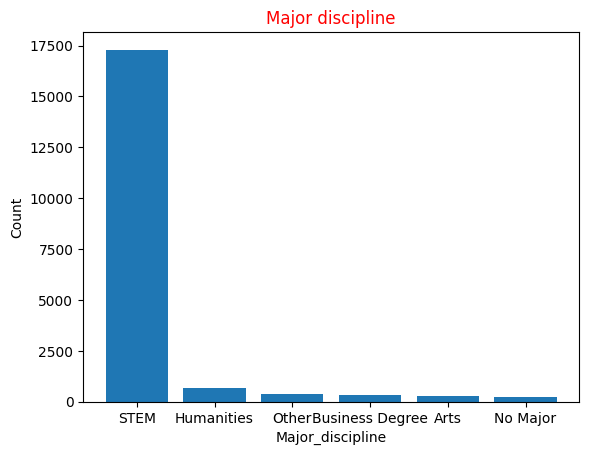

In [ ]:
plt.bar(df.major_discipline.value_counts().index,df.major_discipline.value_counts().values)
plt.title('Major discipline',color='red')
plt.xlabel('Major_discipline')
plt.ylabel('Count')

**Experience**

In [ ]:
df.experience .value_counts()

experience
>20    3351
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: count, dtype: int64

Text(0, 0.5, 'Value')

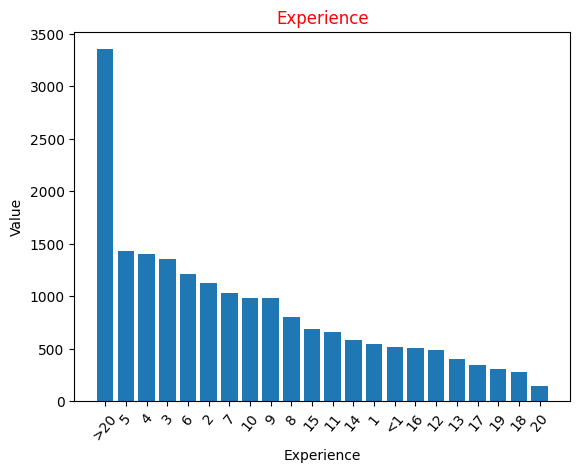

In [ ]:
plt.bar(df.experience.value_counts().index,df.experience.value_counts().values)
plt.xticks(rotation=50)
plt.title('Experience',color='red')
plt.xlabel('Experience')
plt.ylabel('Value')



*  Here we replace >20 and <1 to 20 and 0



In [ ]:
df['experience'].replace(['>20','<1'],['21','0'],inplace=True)
df['experience'] = df['experience'].astype(float)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fccffc651e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fccffc65720>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fccffc64f40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fccffc65c60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fccffc65f00>],
 'means': []}

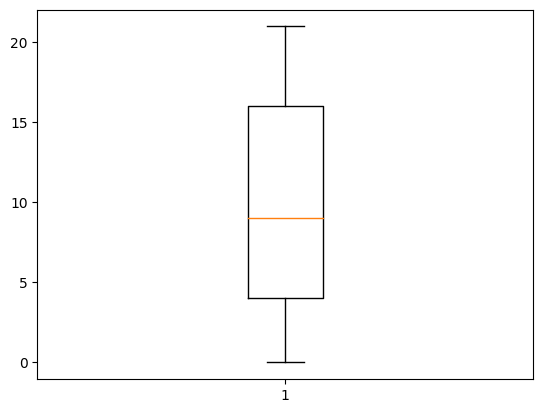

In [ ]:
plt.boxplot(x=df['experience'])

**Company size**

In [ ]:
df.company_size .value_counts()

company_size
50-99        9021
100-500      2571
10000+       2019
Oct-49       1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: count, dtype: int64

Text(0, 0.5, 'Value')

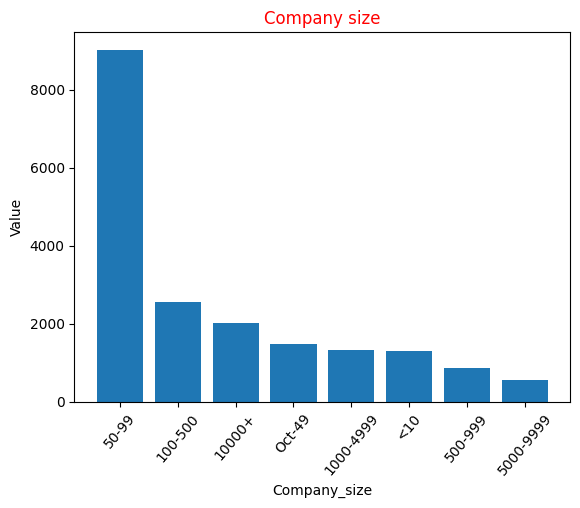

In [ ]:
plt.bar(df.company_size.value_counts().index,df.company_size.value_counts().values)
plt.xticks(rotation=50)
plt.title('Company size',color='red')
plt.xlabel('Company_size')
plt.ylabel('Value')

In [ ]:
df['company_size'].replace(['50-99','100-500','10000+','Oct-49','1000-4999','<10','500-999','5000-9999'],[(50+99)//2,(100+500)//2,10000,(10+49)//2,(1000+4999)//2,9,(500+999)//2,(5000+9999)//2],inplace=True)
df['company_size']=df['company_size'].astype(int)

**Company type**

In [ ]:
df.company_type .value_counts()


company_type
Pvt Ltd                15957
Funded Startup          1001
Public Sector            955
Early Stage Startup      603
NGO                      521
Other                    121
Name: count, dtype: int64

Text(0, 0.5, 'Count')

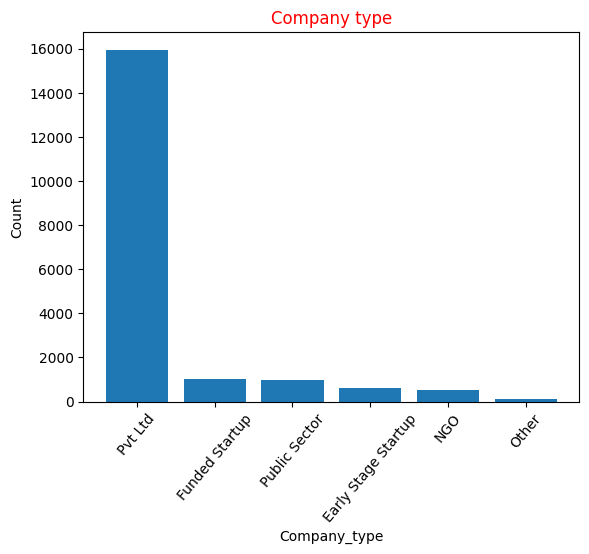

In [ ]:
plt.bar(df.company_type.value_counts().index,df.company_type.value_counts().values)
plt.xticks(rotation=50)
plt.title('Company type',color='red')
plt.xlabel('Company_type')
plt.ylabel('Count')

**Last new job**

In [ ]:
df.last_new_job .value_counts()

last_new_job
1        8463
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: count, dtype: int64

Text(0, 0.5, 'Value')

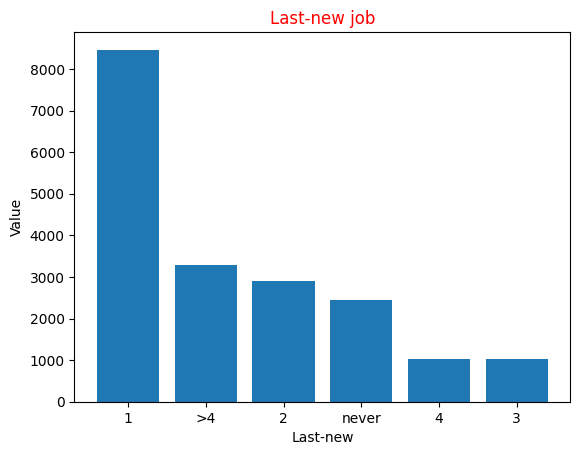

In [ ]:
plt.bar(df.last_new_job.value_counts().index,df.last_new_job.value_counts().values)
plt.title('Last-new job',color='red')
plt.xlabel('Last-new')
plt.ylabel('Value')



*   We replace '>4' and 'never' to 5 and 0 .   



In [ ]:
df['last_new_job']=df['last_new_job'].replace(['>4','never'],['5','0'])
df['last_new_job']=df['last_new_job'].astype(float)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fccffa56620>,
 'caps': [<matplotlib.lines.Line2D at 0x7fccffa56b60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fccffa56380>],
 'medians': [<matplotlib.lines.Line2D at 0x7fccffa570a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fccffa57340>],
 'means': []}

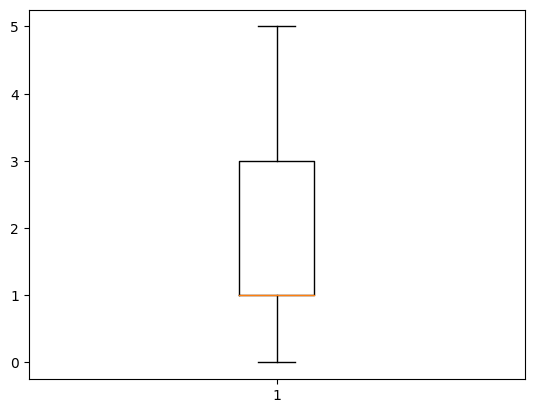

In [ ]:
plt.boxplot(x=df['last_new_job'])

**City development index**

{'whiskers': [<matplotlib.lines.Line2D at 0x7fccff8d9180>,
 'caps': [<matplotlib.lines.Line2D at 0x7fccff8d96c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fccff8d8ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fccff8d9c00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fccff8d9ea0>],
 'means': []}

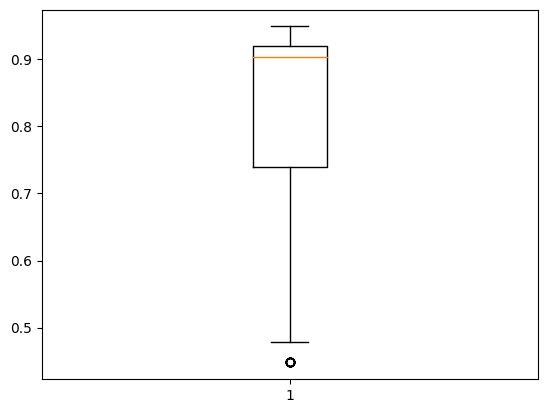

In [ ]:
plt.boxplot(x=df['city_development_index'])

**Training hours**

{'whiskers': [<matplotlib.lines.Line2D at 0x7fccff9275b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fccff9279d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fccff927310>],
 'medians': [<matplotlib.lines.Line2D at 0x7fccff927f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fccff960370>],
 'means': []}

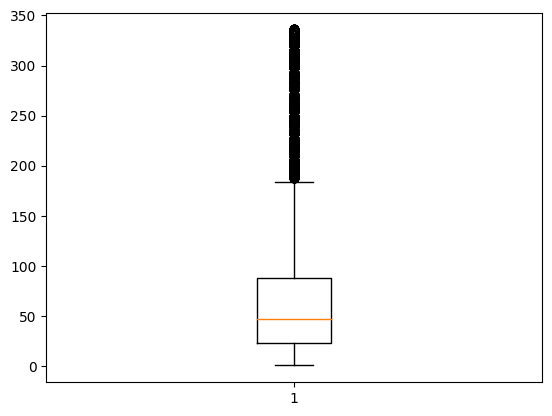

In [ ]:
plt.boxplot(x=df['training_hours'])



*   Here the training hours has more outliers compared to city development index so we remove the outliers from the training hours by iqr method



Handling Outliers

In [ ]:
q1=df['training_hours'].quantile(0.25)
q3=df['training_hours'].quantile(0.75)
iqr=q3-q1
min_range=(q1-(iqr*1.5))
max_range=(q3+(iqr*1.5))
df=df[(df['training_hours']>min_range)&(df['training_hours']<max_range)]
df.reset_index(drop=True,inplace=True)

In [ ]:
df.shape

(18174, 14)



*  We drop the irrelevant columns from the data set




In [ ]:
df1=df.drop(columns=['city','gender','enrollee_id','major_discipline'])
df1.shape

(18174, 10)

In [ ]:
df1.dtypes

city_development_index    float64
relevent_experience        object
enrolled_university        object
education_level             int64
experience                float64
company_size                int64
company_type               object
last_new_job              float64
training_hours              int64
target                      int64
dtype: object



*  Here the relevent experience,enrolled university and company type are nominal datas so we are going to do encoding(get_dummies)




In [ ]:
df2=pd.get_dummies(df1[['relevent_experience','enrolled_university','company_type']],drop_first=True,dtype=int)
df2

,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0,0,1,0,0,0,0,1
1,1,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,1
4,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
18169,1,0,1,0,0,0,0,1
18170,0,0,1,0,0,0,0,1
18171,0,0,1,0,0,0,0,1
18172,0,0,1,0,0,0,0,1


In [ ]:
df_new=pd.concat([df1,df2],axis=1)
df_new

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,Has relevent experience,no_enrollment,2,21.0,74,Pvt Ltd,1.0,36,1,0,0,1,0,0,0,0,1
1,0.776,No relevent experience,no_enrollment,2,15.0,74,Pvt Ltd,5.0,47,0,1,0,1,0,0,0,0,1
2,0.624,No relevent experience,Full time course,2,5.0,74,Pvt Ltd,0.0,83,0,1,0,0,0,0,0,0,1
3,0.789,No relevent experience,no_enrollment,2,0.0,74,Pvt Ltd,0.0,52,1,1,0,1,0,0,0,0,1
4,0.767,Has relevent experience,no_enrollment,3,21.0,74,Funded Startup,4.0,8,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18169,0.878,No relevent experience,no_enrollment,2,14.0,74,Pvt Ltd,1.0,42,1,1,0,1,0,0,0,0,1
18170,0.920,Has relevent experience,no_enrollment,2,14.0,74,Pvt Ltd,4.0,52,1,0,0,1,0,0,0,0,1
18171,0.920,Has relevent experience,no_enrollment,2,21.0,74,Pvt Ltd,4.0,44,0,0,0,1,0,0,0,0,1
18172,0.802,Has relevent experience,no_enrollment,1,0.0,749,Pvt Ltd,2.0,97,0,0,0,1,0,0,0,0,1


In [ ]:
df=df_new.drop(columns=['relevent_experience','enrolled_university','company_type'])
df

,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,2,21.0,74,1.0,36,1,0,0,1,0,0,0,0,1
1,0.776,2,15.0,74,5.0,47,0,1,0,1,0,0,0,0,1
2,0.624,2,5.0,74,0.0,83,0,1,0,0,0,0,0,0,1
3,0.789,2,0.0,74,0.0,52,1,1,0,1,0,0,0,0,1
4,0.767,3,21.0,74,4.0,8,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18169,0.878,2,14.0,74,1.0,42,1,1,0,1,0,0,0,0,1
18170,0.920,2,14.0,74,4.0,52,1,0,0,1,0,0,0,0,1
18171,0.920,2,21.0,74,4.0,44,0,0,0,1,0,0,0,0,1
18172,0.802,1,0.0,749,2.0,97,0,0,0,1,0,0,0,0,1


In [ ]:
df['target'].value_counts()

target
0    13607
1     4567
Name: count, dtype: int64

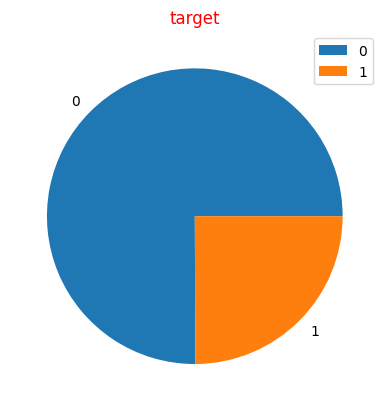

In [ ]:
plt.pie(df.target.value_counts().values,labels=df.target.value_counts().index)
plt.title('target',color='red')
plt.legend()



* From the above figure it clear that the dataset is imbalanced

*   In this data set we can see that the majority class is 0 indicating,  individuals not looking for a job change and the minority class is 1 indicating individuals looking for job change.

* The majority class is approximately 3 times the minority class

*   To tackle the imbalanced condition we use Synethic Minority Over Sampling Technique(SMOTE)








In [ ]:
x=df.drop(columns=['target'])
y=df['target']

In [ ]:
from imblearn.over_sampling import SMOTE
over_sampler=SMOTE()
x_sampled,y_sampled=over_sampler.fit_resample(x,y)

In [ ]:
x_sampled.shape


(27214, 14)

In [ ]:
y_sampled.shape


(27214,)



*   Now the dataset is balanced




In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sampled,y_sampled,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x_train=mm.fit_transform(x_train)
x_test=mm.transform(x_test)

Model Creation

In [ ]:
# model_neighbor=KNeighborsClassifier()
# model_svc=SVC()
# model_bayes=BernoulliNB()
# model_tree=DecisionTreeClassifier()
# model_ensemble=RandomForestClassifier()
# model_xb=xgboost.XGBClassifier()
# model_gbc=GradientBoostingClassifier()

In [ ]:
# models=[model_neighbor,model_svc,model_bayes,model_tree,model_ensemble,model_xb,model_gbc]
# accuracy={}
# for model in models:
#   model.fit(x_train,y_train)
#   y_pred=model.predict(x_test)
#   accuracy[f'{model}_acc']=accuracy_score(y_test,y_pred)
#   print(f'Classification report {model}')
#   print(classification_report(y_test,y_pred))

Classification report KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      4050
           1       0.73      0.76      0.75      4115

    accuracy                           0.74      8165
   macro avg       0.74      0.74      0.74      8165
weighted avg       0.74      0.74      0.74      8165

Classification report SVC()
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      4050
           1       0.74      0.71      0.72      4115

    accuracy                           0.73      8165
   macro avg       0.73      0.73      0.73      8165
weighted avg       0.73      0.73      0.73      8165

Classification report BernoulliNB()
              precision    recall  f1-score   support

           0       0.59      0.81      0.68      4050
           1       0.71      0.45      0.55      4115

    accuracy                           0.63      8165
   macro avg       

##Hyper parameter tunning

#KNN

In [ ]:
# knc_model=GridSearchCV(KNeighborsClassifier(metric='euclidean'),
#  {'weights':['uniform','distance'],'n_neighbors':[i for i in range(1,28,2)]},cv=10,return_train_score=False)
# knc_model.fit(x_train,y_train)
# knc_model.best_params_
# {'n_neighbors': 17, 'weights': 'distance'}


In [ ]:
# knn_model=KNeighborsClassifier(metric='euclidean',weights='distance',n_neighbors=17)
# knn_model.fit(x_train,y_train)
# y_pred_knn=knn_model.predict(x_test)
# print(accuracy_score(y_test,y_pred_knn))
# print(classification_report(y_test,y_pred_knn))

0.7540722596448255
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      4050
           1       0.74      0.79      0.76      4115

    accuracy                           0.75      8165
   macro avg       0.76      0.75      0.75      8165
weighted avg       0.76      0.75      0.75      8165



#SVM

In [ ]:
# svm_model=RandomizedSearchCV(SVC(),
# {'kernel':['linear','rbf','poly','sigmoid'],'C':[0.0001,0.001,0.01,.1,1,10,100],'gamma':['scale','auto']},cv=5,n_iter=5)
# svm_model.fit(x_train,y_train)
# svm_model.best_params_
# {'kernel': 'rbf', 'gamma': 'auto', 'C': 1}


In [ ]:
svc_model=SVC(kernel='rbf',C=1,gamma='auto')
svc_model.fit(x_train,y_train)
y_pred_svc=svc_model.predict(x_test)
print(accuracy_score(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

0.7540722596448255
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      4050
           1       0.74      0.79      0.76      4115

    accuracy                           0.75      8165
   macro avg       0.76      0.75      0.75      8165
weighted avg       0.76      0.75      0.75      8165



#Decision Tree

In [ ]:
dtc_model=GridSearchCV(DecisionTreeClassifier(),{'criterion':['gini','entropy'],'class_weight':['balanced','None'],'min_samples_split':[4,6,8,10],
'max_depth':[5,10,15],'splitter':['best','random']},cv=10)
dtc_model.fit(x_train,y_train)
dtc_model.best_params_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _vali

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 6,
 'splitter': 'best'}

In [ ]:
# tree_model=DecisionTreeClassifier(criterion='gini',class_weight='balanced',min_samples_split=8,max_depth=15,splitter='best')
# tree_model.fit(x_train,y_train)
# y_pred_tree=tree_model.predict(x_test)
# print(accuracy_score(y_test,y_pred_tree))
# print(classification_report(y_test,y_pred_tree))

0.7545621555419474
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      4050
           1       0.74      0.78      0.76      4115

    accuracy                           0.75      8165
   macro avg       0.76      0.75      0.75      8165
weighted avg       0.76      0.75      0.75      8165



#Random Forest

In [ ]:
# rf_model=GridSearchCV(RandomForestClassifier(),{'n_estimators':[10,50,70,90,100],'criterion':['gini','entropy']},cv=5)
# rf_model.fit(x_train,y_train)
# rf_model.best_params_
# {'criterion': 'entropy', 'n_estimators': 100}

In [ ]:
# rfc_model=RandomForestClassifier(criterion='entropy',n_estimators=100)
# rfc_model.fit(x_train,y_train)
# y_pred_rfc=rfc_model.predict(x_test)
# print(accuracy_score(y_test,y_pred_rfc))
# print(classification_report(y_test,y_pred_rfc))

0.8187385180649112
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4050
           1       0.82      0.82      0.82      4115

    accuracy                           0.82      8165
   macro avg       0.82      0.82      0.82      8165
weighted avg       0.82      0.82      0.82      8165



#XGBoost

In [ ]:
# xb_model=GridSearchCV(xgboost.XGBClassifier(),{'n_estimators':[100,500,1000],'learning_rate':[0.001,0.01,0.1]},cv=5)
# xb_model.fit(x_train,y_train)
# xb_model.best_params_
# {'learning_rate': 0.1, 'n_estimators': 500}

In [ ]:
# xgb_model=xgboost.XGBClassifier(n_estimators=500,learning_rate=0.1)
# xgb_model.fit(x_train,y_train)
# y_pred_xgb=xgb_model.predict(x_test)
# print(accuracy_score(y_test,y_pred_xgb))
# print(classification_report(y_test,y_pred_xgb))

0.8271892222902634
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      4050
           1       0.84      0.82      0.83      4115

    accuracy                           0.83      8165
   macro avg       0.83      0.83      0.83      8165
weighted avg       0.83      0.83      0.83      8165



#GradientBoosting

In [ ]:
# gb_model=GridSearchCV(GradientBoostingClassifier(),{'n_estimators':[100,500,1000],'learning_rate':[0.001,0.01,0.1]},cv=5)
# gb_model.fit(x_train,y_train)
# gb_model.best_params_
# {'learning_rate': 0.1, 'n_estimators': 1000}

In [ ]:
# gbc_model=GradientBoostingClassifier(n_estimators=1000,learning_rate=0.1)
# gbc_model.fit(x_train,y_train)
# y_pred_gbc=gbc_model.predict(x_test)
# print(accuracy_score(y_test,y_pred_gbc))
# print(classification_report(y_test,y_pred_gbc))

0.8361298224127373
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      4050
           1       0.85      0.82      0.83      4115

    accuracy                           0.84      8165
   macro avg       0.84      0.84      0.84      8165
weighted avg       0.84      0.84      0.84      8165



Gradient Boosting Classifier seems to have the highest accuracy and balanced precision and recall. It may be a good choice for predicting whether a candidate will join the company  or not after the training given by the company.

In [ ]:
# y_pred1=gbc_model.predict([[df['city_development_index'][2],df['education_level'][2],df['experience'][2],df['company_size'][2],df['last_new_job'][2],
#                          df['training_hours'][2],df['relevent_experience_No relevent experience'][2],df['enrolled_university_Part time course'][2],
#                          df['enrolled_university_no_enrollment'][2],df['company_type_Funded Startup'][2],df['company_type_NGO'][2],
#                          df['company_type_Other'][2],df['company_type_Public Sector'][2],df['company_type_Pvt Ltd'][2]]])
# y_pred1

array([0])

In [ ]:
df['target'][2]

0

#Project outcome
This project demonstrates several techniques and methods by which the data can be transformed & used to predict with various features whether a person will join the company after training given by the company.

While exporing various algorithms, we observed that ensemble model Gradient Boosting produces the best result as it can automatically balance data sets when a class is more infrequent than other classes in the data.